In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
import scikitplot as skplt
from collections import Counter
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,BaseNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.svm import NuSVC,NuSVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve,
                             auc,
                             confusion_matrix,
                             recall_score,
                             roc_auc_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             classification_report,
                             f1_score,
                             precision_recall_fscore_support)
from sklearn.preprocessing import label_binarize,OneHotEncoder,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
%matplotlib inline

In [125]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",verticalalignment ="center",fontsize=30,multialignment="center"
                 ,color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [126]:
# some global variables
n_neighbors = 3
models = {'Naive Bayes':[],
          'KNN':[],
          'LDA':[],
          'QDA':[],
          'Linear SVM':[],
          'Non Linear SVM':[],
          'Logistic Regression':[],
          'CART':[],
          'Random Forest':[],
          'AdaBoost':[],
          'GradBoost':[]}

In [127]:
#Loading the data
data = pd.read_csv('D:/m2/app_sup/projet_app_sup_20/Datasets_projet_MLDS/VisaPremier.txt',delimiter='\t')
data

,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,nbimpaye,...,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,cartevp,sexer,cartevpr,nbjdebit
0,148009,31,1,Shom,51,Fmar,238,Pcad,A,0,...,0,14,2,0,1303700,556967,Coui,0,1,1
1,442153,82,6,Shom,52,Fmar,270,Pcad,A,0,...,19500000,5,2,0,19856243,133896,Coui,0,1,0
2,552427,97,1,Shom,58,Fmar,139,Pcad,C,0,...,0,0,1,0,122745,0,Coui,0,1,0
3,556005,40,1,Shom,27,Fcel,99,Psan,B,0,...,0,14,2,0,83224,0,Coui,0,1,0
4,556686,65,1,Shom,49,Fsep,89,Pemp,A,0,...,0,11,3,1,494773,21423,Coui,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,7567726,31,1,Sfem,38,Fmar,23,Psan,.,0,...,0,.,0,0,0,0,Cnon,1,0,0
1069,7572458,31,1,Sfem,43,Fmar,27,Pcad,.,0,...,0,.,0,0,10685,0,Cnon,1,0,0
1070,7574479,32,1,Sfem,49,Fmar,31,Pemp,B,0,...,0,9,1,0,63336,0,Cnon,1,0,9
1071,7580358,65,3,Sfem,27,F.,192,Psan,D,0,...,0,2,1,0,27897,0,Cnon,1,0,38


In [128]:
for col in data.columns:
    
    cnt=data[data[col]=='.'][col].count()
    if(cnt>0):
        print(col)
        print(cnt)
    

D:\annaconda\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


departem
7
codeqlt
133
agemvt
6
nbpaiecb
278


il existe un certain nombre de variables quantitatives nous decidons de les supprimmer pour la suite de l'experiance

In [129]:


var_qual=data.dtypes[data.dtypes == "object"]



In [130]:
print(var_qual)

departem    object
sexe        object
sitfamil    object
csp         object
codeqlt     object
agemvt      object
nbpaiecb    object
cartevp     object
dtype: object


In [131]:
to_drop = ['cartevpr','departem','sexe' ,'sitfamil'  ,  
'csp'  ,     
'codeqlt'  , 
'agemvt','nbpaiecb'  ,  
'cartevp','matricul','age','sexer']

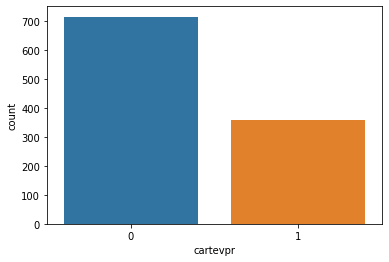

In [132]:
# Check imbalance
ax = sns.countplot(x='cartevpr', data=data)

In [133]:
l=data.sort_values('anciente', ascending=False)
l=l[l['cartevpr']==0]

In [134]:
X=pd.concat([data[0:359],l[0:359]],axis=0)

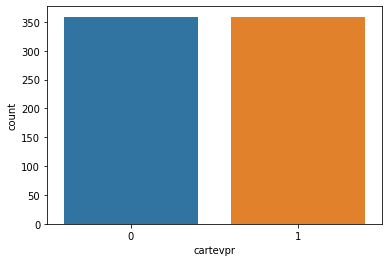

In [135]:
ax = sns.countplot(x='cartevpr', data=X)

In [136]:
label=X['cartevpr']

In [137]:
data_smote  = X.drop(to_drop,axis=1)

In [143]:
x = data_smote.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_c_n = pd.concat([pd.DataFrame(x_scaled),pd.DataFrame(label.values)],axis=1)
#data_c_n=data_c_n[0:759]
data_c_n

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,0
0,0.000000,0.272727,0.0,1.0,0.000000,0.005874,0.723648,0.040404,0.034327,0.0000,...,0.0,0.0,0.0,0.0,0.4,0.0,0.065657,0.078817,0.007463,1
1,0.833333,0.309551,0.0,1.0,0.142857,1.000000,0.009196,0.000000,0.000000,0.0000,...,0.0,0.0,1.0,1.0,0.4,0.0,1.000000,0.018948,0.000000,1
2,0.000000,0.158803,0.0,1.0,0.000000,0.002043,0.003507,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.2,0.0,0.006182,0.000000,0.000000,1
3,0.000000,0.112773,0.0,1.0,0.000000,0.000868,0.078681,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.4,0.0,0.004191,0.000000,0.000000,1
4,0.000000,0.101266,0.0,1.0,0.000000,0.019102,0.487990,0.000000,0.060197,0.0756,...,0.0,0.0,0.0,0.0,0.6,0.5,0.024918,0.003032,0.111940,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.000000,0.156502,0.0,1.0,0.000000,0.001430,0.027093,0.111111,0.060873,0.0000,...,0.0,0.0,0.0,0.0,0.2,0.0,0.002784,0.000000,0.000000,0
714,0.000000,0.155351,0.0,1.0,0.107143,0.000204,0.000000,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.2,0.0,0.000108,0.000000,0.000000,0
715,0.000000,0.155351,0.0,1.0,0.000000,0.000919,0.048990,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.2,0.0,0.004374,0.004571,0.022388,0
716,0.000000,0.155351,0.0,1.0,0.000000,0.000000,0.064172,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005603,0.006936,0.000000,0


In [144]:
x = data_smote.values #returns a numpy array
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)
data_c_s = pd.concat([pd.DataFrame(x_scaled),pd.DataFrame(label.values)],axis=1)
#data_c_s=data_c_s[0:759]
data_c_s

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,0
0,-0.597574,0.193795,0.0,0.052131,-0.563134,0.066370,4.745489,-0.179681,0.050650,-0.218471,...,-0.052852,-0.037346,-0.037346,-0.037346,0.831275,-0.322841,1.233477,1.169483,-0.501460,1
1,4.066101,0.383350,0.0,0.052131,0.685763,26.528044,-0.482398,-0.481638,-0.358788,-0.218471,...,-0.052852,-0.037346,26.776856,26.776856,0.831275,-0.322841,21.975713,0.145570,-0.542529,1
2,-0.597574,-0.392640,0.0,0.052131,-0.563134,-0.035594,-0.524024,-0.481638,-0.358788,-0.218471,...,-0.052852,-0.037346,-0.037346,-0.037346,-0.292747,-0.322841,-0.086862,-0.178485,-0.542529,1
3,-0.597574,-0.629583,0.0,0.052131,-0.563134,-0.066863,0.026051,-0.481638,-0.358788,-0.218471,...,-0.052852,-0.037346,-0.037346,-0.037346,0.831275,-0.322841,-0.131047,-0.178485,-0.542529,1
4,-0.597574,-0.688819,0.0,0.052131,-0.563134,0.418486,3.021095,-0.481638,0.359218,1.217464,...,-0.052852,-0.037346,-0.037346,-0.037346,1.955297,2.767826,0.329075,-0.126637,0.073500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,-0.597574,-0.404487,0.0,0.052131,-0.563134,-0.051908,-0.351440,0.348744,0.367276,-0.218471,...,-0.052852,-0.037346,-0.037346,-0.037346,-0.292747,-0.322841,-0.162298,-0.178485,-0.542529,0
714,-0.597574,-0.410411,0.0,0.052131,0.373539,-0.084536,-0.549687,-0.481638,-0.358788,-0.218471,...,-0.052852,-0.037346,-0.037346,-0.037346,-0.292747,-0.322841,-0.221693,-0.178485,-0.542529,0
715,-0.597574,-0.410411,0.0,0.052131,-0.563134,-0.065503,-0.191213,-0.481638,-0.358788,-0.218471,...,-0.052852,-0.037346,-0.037346,-0.037346,-0.292747,-0.322841,-0.126999,-0.100315,-0.419323,0
716,-0.597574,-0.410411,0.0,0.052131,-0.563134,-0.089974,-0.080118,-0.481638,-0.358788,-0.218471,...,-0.052852,-0.037346,-0.037346,-0.037346,-1.416768,-0.322841,-0.099700,-0.059859,-0.542529,0


In [145]:
# Check for missing values 
np.any(data_c_s.isnull().values)

False

In [146]:
# A statistical summary of the data before/after normalisation
data_c_s.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,0
count,7.180000e+02,7.180000e+02,718.0,7.180000e+02,7.180000e+02,7.180000e+02,7.180000e+02,7.180000e+02,7.180000e+02,7.180000e+02,...,7.180000e+02,7.180000e+02,7.180000e+02,7.180000e+02,7.180000e+02,7.180000e+02,7.180000e+02,7.180000e+02,7.180000e+02,718.000000
mean,-3.240985e-16,1.592660e-17,0.0,-1.760237e-16,-2.388990e-16,-3.301290e-17,1.042960e-16,-9.896138e-17,4.068241e-16,4.437800e-17,...,1.093407e-16,-2.216774e-16,-4.622192e-16,-4.622192e-16,-1.749065e-15,5.405766e-16,-7.634716e-18,2.617838e-16,1.886451e-16,0.500000
std,1.000697e+00,1.000697e+00,0.0,1.000697e+00,1.000697e+00,1.000697e+00,1.000697e+00,1.000697e+00,1.000697e+00,1.000697e+00,...,1.000697e+00,1.000697e+00,1.000697e+00,1.000697e+00,1.000697e+00,1.000697e+00,1.000697e+00,1.000697e+00,1.000697e+00,0.500349
min,-5.975740e-01,-1.210095e+00,0.0,-2.646061e+01,-5.631343e-01,-8.997439e-02,-5.496871e-01,-4.816384e-01,-3.587884e-01,-2.184713e-01,...,-5.285164e-02,-3.734568e-02,-3.734568e-02,-3.734568e-02,-1.416768e+00,-3.228413e-01,-2.240939e-01,-1.784846e-01,-5.425286e-01,0.000000
25%,-5.975740e-01,-4.163343e-01,0.0,5.213057e-02,-5.631343e-01,-8.045776e-02,-5.494985e-01,-4.816384e-01,-3.587884e-01,-2.184713e-01,...,-5.285164e-02,-3.734568e-02,-3.734568e-02,-3.734568e-02,-2.927466e-01,-3.228413e-01,-2.149685e-01,-1.784846e-01,-5.425286e-01,0.000000
50%,-5.975740e-01,-9.646045e-02,0.0,5.213057e-02,-2.509101e-01,-6.686257e-02,-4.395989e-01,-4.816384e-01,-3.587884e-01,-2.184713e-01,...,-5.285164e-02,-3.734568e-02,-3.734568e-02,-3.734568e-02,-2.927466e-01,-3.228413e-01,-1.680573e-01,-1.784846e-01,-5.425286e-01,0.500000
75%,3.351610e-01,2.826493e-01,0.0,5.213057e-02,6.131424e-02,-4.103172e-02,7.866806e-02,1.222758e-01,-1.027523e-01,-2.184713e-01,...,-5.285164e-02,-3.734568e-02,-3.734568e-02,-3.734568e-02,8.312751e-01,-3.228413e-01,-3.906915e-02,-1.539850e-01,-4.970557e-02,1.000000
max,4.998836e+00,3.937504e+00,0.0,5.213057e-02,8.179146e+00,2.652804e+01,6.767645e+00,6.991799e+00,1.156874e+01,1.877537e+01,...,1.892089e+01,2.677686e+01,2.677686e+01,2.677686e+01,4.203340e+00,5.858493e+00,2.197571e+01,1.692410e+01,4.960662e+00,1.000000


In [147]:
def results_report(model,y_te,y_te_binarised,y_pred,y_pred_binarized):
    metrics={'acc':0,
         'bal_acc':0,
         'recall':0,
         'f_1_score':0,
         'roc_auc_score':0}
    #y_pred = model.predict(x_te)
    metrics['acc']=accuracy_score(y_te,y_pred)
    metrics['bal_acc']=accuracy_score(y_te,y_pred)
    metrics['recall']=recall_score(y_te,y_pred,average='macro')
    metrics['f_1_score']=f1_score(y_te,y_pred,average='macro')
    metrics['roc_auc_score']=roc_auc_score(y_te,y_pred)
    
    plt.bar(metrics.keys(),metrics.values())
    plt.show()
    return metrics

def results_report_cross_val(model,y_te,y_te_binarised,y_pred,y_pred_binarized,x):
    metrics={'acc':0,
         'bal_acc':0,
         'recall':0,
         'f_1_score':0,
         'roc_auc_score':0}
    #y_pred = model.predict(x_te)
    
    metrics['acc']=cross_val_score(model, x,y_te, cv=5, scoring=make_scorer(accuracy_score)).mean()
    metrics['bal_acc']=cross_val_score(model, x,y_te, cv=5, scoring=make_scorer(balanced_accuracy_score)).mean()
    metrics['recall']=cross_val_score(model, x,y_te, cv=5, scoring='recall_macro').mean()
    metrics['f_1_score']=cross_val_score(model, x,y_te, cv=5, scoring='f1_macro').mean()
    metrics['roc_auc_score']=cross_val_score(model, x,y_te, cv=5, scoring=make_scorer(roc_auc_score)).mean()
    
    plt.bar(metrics.keys(),metrics.values())
    plt.show()
    return metrics

def plot_curves(model,y_true,y_pred,y_probas=None):
    #y_pred = model.predict(x_te)
    cnf_matrix = confusion_matrix(y_true,y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['have_card','No_card'],
                      title='Confusion matrix')

    
    #predict_proba = getattr(model, "predict_proba", None)
    if (y_probas is not None):
        y_probas = model.predict_proba(x_te)
        skplt.metrics.plot_roc(y_true, y_probas)
        skplt.metrics.plot_precision_recall(y_true,y_probas)

In [148]:
# splittign the dataset
#Change data_c_s to data_c_n to use normalized data
x_t,x_te,y_t,y_te = train_test_split(data_c_n.values[:,:-1],
                                     data_c_n.values[:,-1],
                                     test_size=0.33, 
                                     random_state=42)
classes = list(set(y_te).union(set(y_t)))
y_te_bin = label_binarize(y_te,classes)

# Naive Bayes classifier

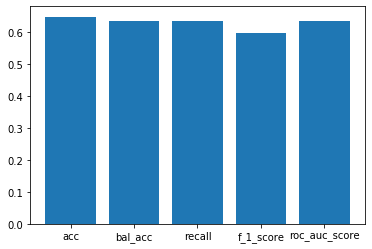

{'acc': 0.6490002712967987, 'bal_acc': 0.6369400397840295, 'recall': 0.6369400397840295, 'f_1_score': 0.59919031492542, 'roc_auc_score': 0.6369400397840296}
              precision    recall  f1-score   support

         0.0       0.58      0.82      0.68       107
         1.0       0.77      0.50      0.61       130

    accuracy                           0.65       237
   macro avg       0.67      0.66      0.64       237
weighted avg       0.68      0.65      0.64       237



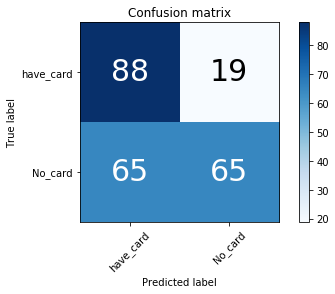

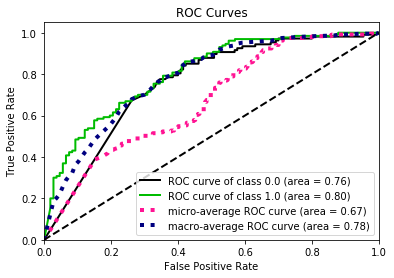

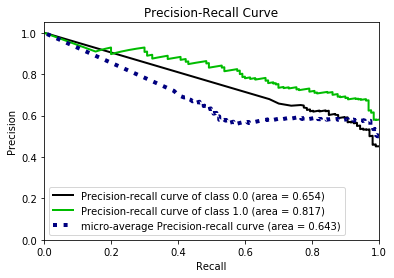

In [149]:
NB_model = GaussianNB()

#evaluating the model
NB_model.fit(x_t,y_t)
y_pred =cross_val_predict(NB_model, x_te, y_te, cv=3)
predict_proba = getattr(NB_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = NB_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(NB_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Naive Bayes']=r
#ax.set_ylim(interp.data.c - .5, - .5)
plot_curves(NB_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

# KNN

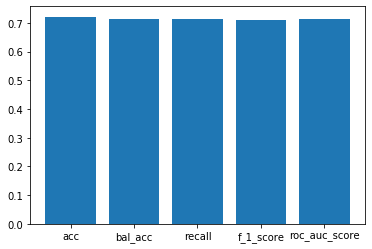

{'acc': 0.721313754747694, 'bal_acc': 0.713998294970162, 'recall': 0.713998294970162, 'f_1_score': 0.7103588345189097, 'roc_auc_score': 0.713998294970162}
              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73       107
         1.0       0.79      0.72      0.76       130

    accuracy                           0.74       237
   macro avg       0.74      0.74      0.74       237
weighted avg       0.75      0.74      0.74       237



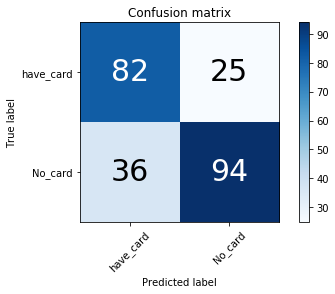

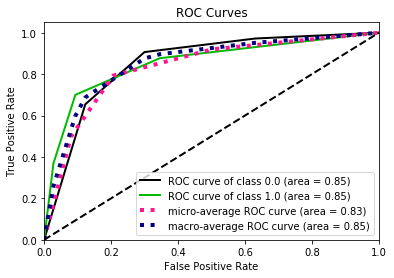

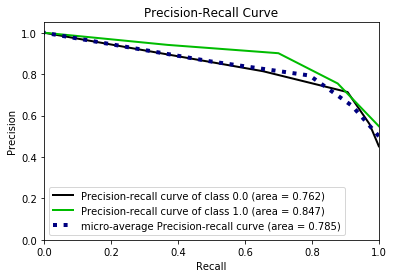

In [150]:


KNN_model = KNeighborsClassifier(n_neighbors=n_neighbors)
# fitting the model
KNN_model.fit(x_t,y_t)
#evaluating the model
y_pred =cross_val_predict(KNN_model, x_te, y_te, cv=3)
predict_proba = getattr(KNN_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = KNN_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(KNN_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['KNN']=r
#ax.set_ylim(interp.data.c - .5, - .5)
plot_curves(KNN_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))


# LDA

D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables ar

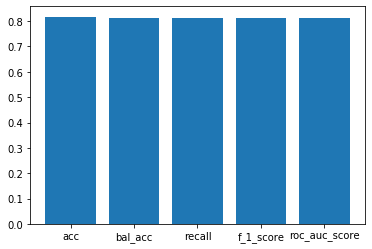

{'acc': 0.8170885331886417, 'bal_acc': 0.8135436203466894, 'recall': 0.8135436203466894, 'f_1_score': 0.814334703195339, 'roc_auc_score': 0.8135436203466894}
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82       107
         1.0       0.85      0.85      0.85       130

    accuracy                           0.84       237
   macro avg       0.83      0.83      0.83       237
weighted avg       0.84      0.84      0.84       237



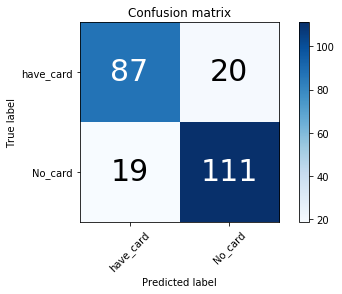

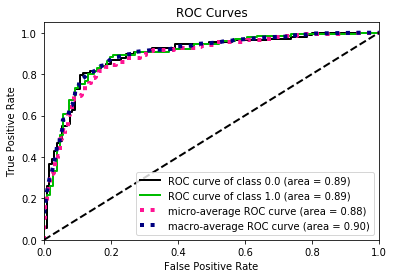

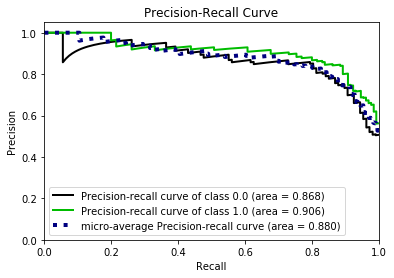

In [151]:
LDA_model = LinearDiscriminantAnalysis()
# fitting the model
LDA_model.fit(x_t,y_t)
#evaluating the model
y_pred =cross_val_predict(LDA_model , x_te, y_te, cv=3)
predict_proba = getattr(LDA_model , "predict_proba", None)
if callable(predict_proba):
    y_probas = LDA_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(LDA_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['LDA']=r
plot_curves(LDA_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))



# QDA

D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear


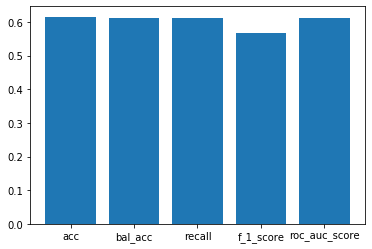

{'acc': 0.6149048200397902, 'bal_acc': 0.6109832338732595, 'recall': 0.6109832338732595, 'f_1_score': 0.566816470782437, 'roc_auc_score': 0.6109832338732595}
              precision    recall  f1-score   support

         0.0       0.62      0.67      0.64       107
         1.0       0.71      0.65      0.68       130

    accuracy                           0.66       237
   macro avg       0.66      0.66      0.66       237
weighted avg       0.67      0.66      0.66       237



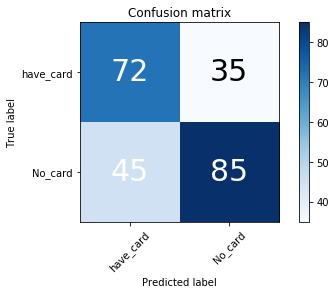

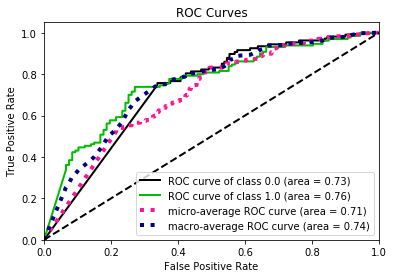

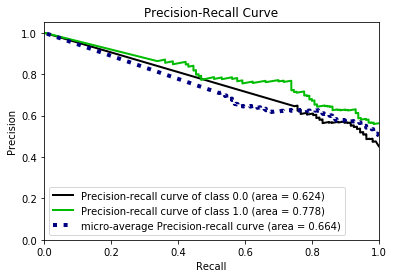

In [152]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(QDA_model , x_te, y_te, cv=3)
predict_proba = getattr(QDA_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = QDA_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(QDA_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['QDA']=r
plot_curves(QDA_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))



# Linear SVM

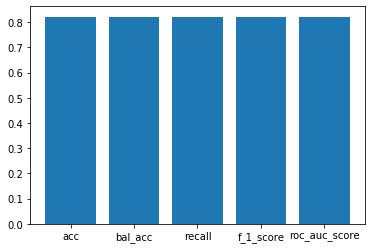

{'acc': 0.8211679327183938, 'bal_acc': 0.8188485365160558, 'recall': 0.8188485365160558, 'f_1_score': 0.8194140605982818, 'roc_auc_score': 0.8188485365160556}
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       107
         1.0       0.87      0.88      0.87       130

    accuracy                           0.86       237
   macro avg       0.86      0.86      0.86       237
weighted avg       0.86      0.86      0.86       237



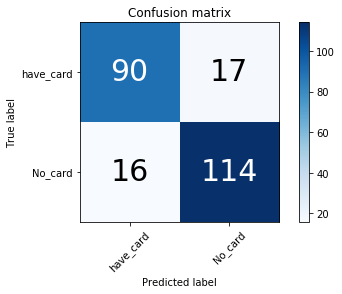

In [153]:
LSVM_model = LinearSVC()
LSVM_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(LSVM_model , x_te, y_te, cv=3)
predict_proba = getattr(LSVM_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = LSVM_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(LSVM_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Linear SVM']=r
plot_curves(LSVM_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

# Non Linear SVM

D:\annaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\annaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\annaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\annaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

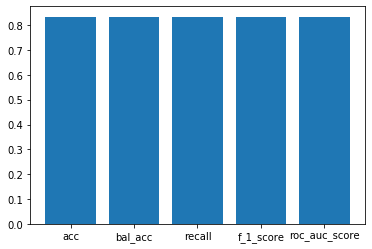

{'acc': 0.833668384879725, 'bal_acc': 0.8315441886899688, 'recall': 0.8315441886899688, 'f_1_score': 0.8323990730077024, 'roc_auc_score': 0.8315441886899688}
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       107
         1.0       0.88      0.89      0.89       130

    accuracy                           0.87       237
   macro avg       0.87      0.87      0.87       237
weighted avg       0.87      0.87      0.87       237



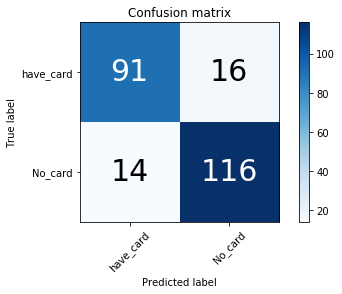

In [154]:
NLSVM_model = NuSVC()
NLSVM_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(NLSVM_model , x_te, y_te, cv=3)
predict_proba = getattr(NLSVM_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = NLSVM_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(NLSVM_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Non Linear SVM']=r
plot_curves(NLSVM_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

# Logistic Regression

D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\annaconda\lib\site-packages

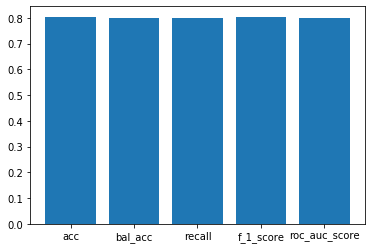

{'acc': 0.8045442213781877, 'bal_acc': 0.8014089229894855, 'recall': 0.8014089229894855, 'f_1_score': 0.8021392757954413, 'roc_auc_score': 0.8014089229894857}
              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80       107
         1.0       0.82      0.89      0.85       130

    accuracy                           0.83       237
   macro avg       0.83      0.82      0.83       237
weighted avg       0.83      0.83      0.83       237



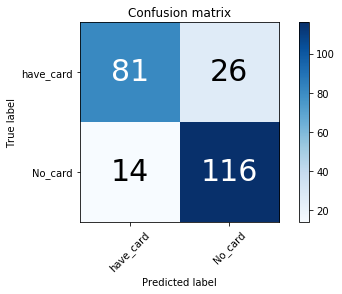

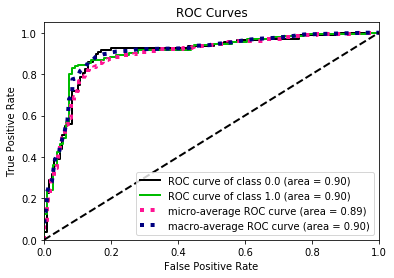

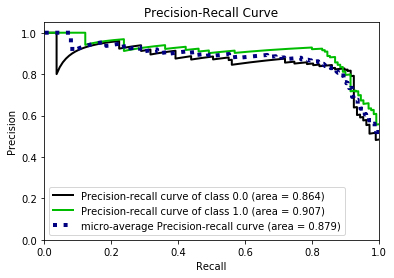

In [155]:
LR_model = LogisticRegression()
LR_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(LR_model , x_te, y_te, cv=3)
predict_proba = getattr(LR_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = LR_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(LR_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Logistic Regression']=r
plot_curves(LR_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))



# CART

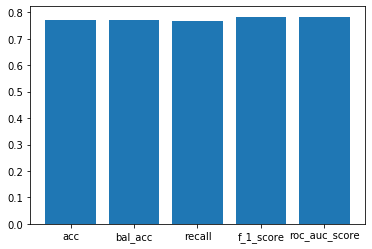

{'acc': 0.7712515825646591, 'bal_acc': 0.7722512077294686, 'recall': 0.768581983518045, 'f_1_score': 0.7805724580900024, 'roc_auc_score': 0.7831520318272236}
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       107
         1.0       0.87      0.85      0.86       130

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237



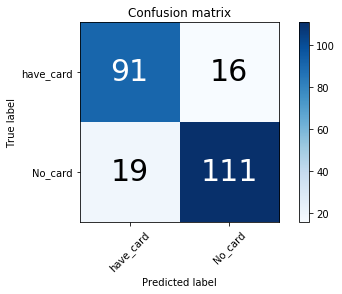

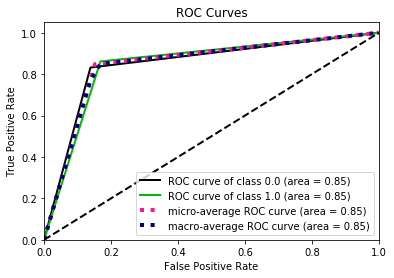

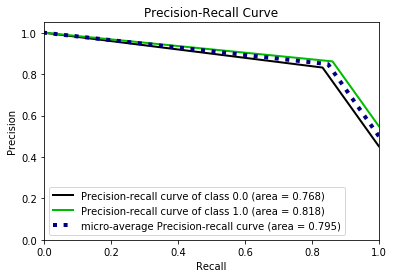

In [156]:
CART_model = DecisionTreeClassifier()
CART_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(CART_model , x_te, y_te, cv=3)
predict_proba = getattr(CART_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = CART_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(CART_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['CART']=r
plot_curves(CART_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))



# Random Forest

D:\annaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


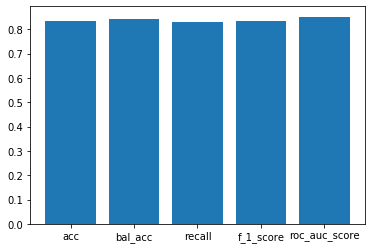

{'acc': 0.8335390667390126, 'bal_acc': 0.8424609263995453, 'recall': 0.8279221369707302, 'f_1_score': 0.8348532096727519, 'roc_auc_score': 0.8507695368002273}
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       107
         1.0       0.85      0.85      0.85       130

    accuracy                           0.84       237
   macro avg       0.84      0.84      0.84       237
weighted avg       0.84      0.84      0.84       237



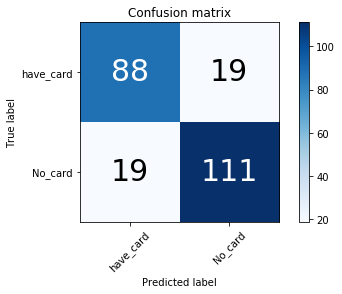

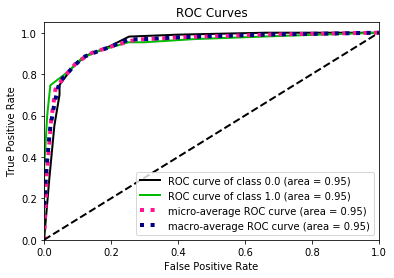

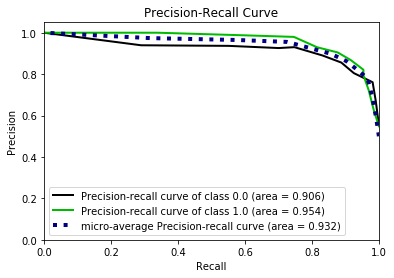

In [157]:
RF_model = RandomForestClassifier()
RF_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(RF_model , x_te, y_te, cv=3)
predict_proba = getattr(RF_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = RF_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(RF_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Random Forest']=r
plot_curves(RF_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

# Ada Boost

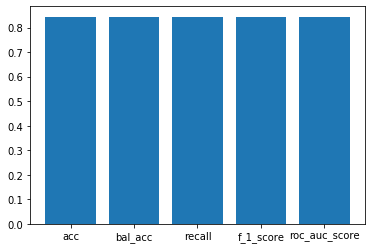

{'acc': 0.844064930367155, 'bal_acc': 0.8428962773515203, 'recall': 0.8428962773515203, 'f_1_score': 0.8432776272490129, 'roc_auc_score': 0.8428962773515203}
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       107
         1.0       0.86      0.87      0.86       130

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237



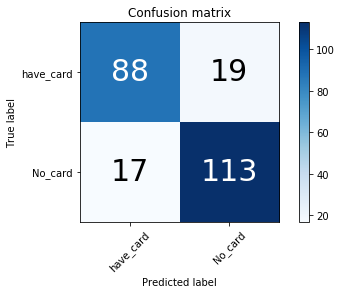

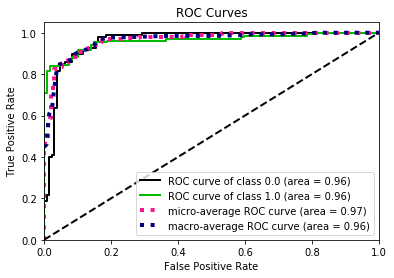

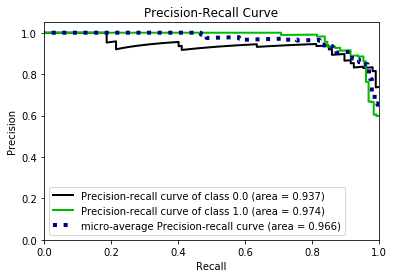

In [158]:
AB_model = AdaBoostClassifier()
AB_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(AB_model , x_te, y_te, cv=3)
predict_proba = getattr(AB_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = AB_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(AB_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['AdaBoost']=r
plot_curves(AB_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

# Gradient Boost

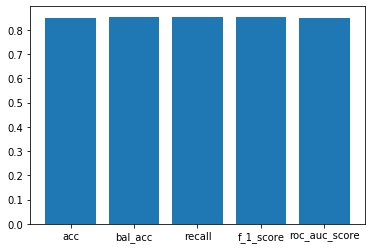

{'acc': 0.8501842557424488, 'bal_acc': 0.8530400682011935, 'recall': 0.8530400682011935, 'f_1_score': 0.853606587575317, 'roc_auc_score': 0.8468661551577152}
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       107
         1.0       0.89      0.88      0.88       130

    accuracy                           0.87       237
   macro avg       0.87      0.87      0.87       237
weighted avg       0.87      0.87      0.87       237



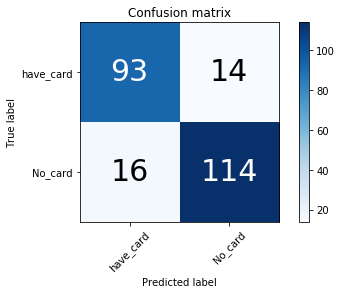

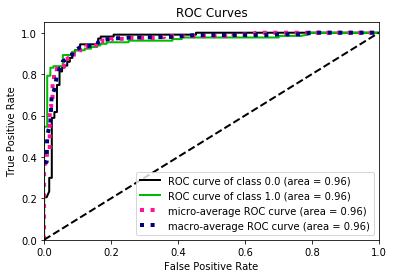

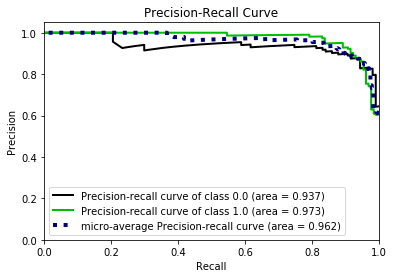

In [159]:
GB_model = GradientBoostingClassifier()
GB_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(GB_model , x_te, y_te, cv=3)
predict_proba = getattr(GB_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = GB_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(GB_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['GradBoost']=r
plot_curves(GB_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

In [160]:
models

{'Naive Bayes': {'acc': 0.6490002712967987,
  'bal_acc': 0.6369400397840295,
  'recall': 0.6369400397840295,
  'f_1_score': 0.59919031492542,
  'roc_auc_score': 0.6369400397840296},
 'KNN': {'acc': 0.721313754747694,
  'bal_acc': 0.713998294970162,
  'recall': 0.713998294970162,
  'f_1_score': 0.7103588345189097,
  'roc_auc_score': 0.713998294970162},
 'LDA': {'acc': 0.8170885331886417,
  'bal_acc': 0.8135436203466894,
  'recall': 0.8135436203466894,
  'f_1_score': 0.814334703195339,
  'roc_auc_score': 0.8135436203466894},
 'QDA': {'acc': 0.6149048200397902,
  'bal_acc': 0.6109832338732595,
  'recall': 0.6109832338732595,
  'f_1_score': 0.566816470782437,
  'roc_auc_score': 0.6109832338732595},
 'Linear SVM': {'acc': 0.8211679327183938,
  'bal_acc': 0.8188485365160558,
  'recall': 0.8188485365160558,
  'f_1_score': 0.8194140605982818,
  'roc_auc_score': 0.8188485365160556},
 'Non Linear SVM': {'acc': 0.833668384879725,
  'bal_acc': 0.8315441886899688,
  'recall': 0.8315441886899688,
  

In [161]:
m = pd.DataFrame.from_dict(models).T
m = m.sort_values(by =list(m),ascending=False)
m

,acc,bal_acc,recall,f_1_score,roc_auc_score
GradBoost,0.850184,0.853040,0.853040,0.853607,0.846866
AdaBoost,0.844065,0.842896,0.842896,0.843278,0.842896
Non Linear SVM,0.833668,0.831544,0.831544,0.832399,0.831544
Random Forest,0.833539,0.842461,0.827922,0.834853,0.850770
Linear SVM,0.821168,0.818849,0.818849,0.819414,0.818849
LDA,0.817089,0.813544,0.813544,0.814335,0.813544
Logistic Regression,0.804544,0.801409,0.801409,0.802139,0.801409
CART,0.771252,0.772251,0.768582,0.780572,0.783152
KNN,0.721314,0.713998,0.713998,0.710359,0.713998
Naive Bayes,0.649000,0.636940,0.636940,0.599190,0.636940


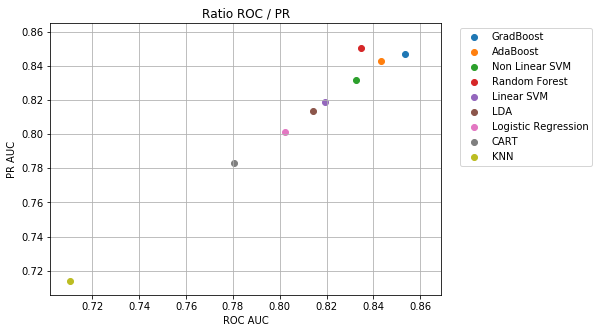

In [162]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
for i in range(0,11):
    
    
    if (m['f_1_score'][i] > 0.7 and m['roc_auc_score'][i] > 0.7):
        ax.scatter(m['f_1_score'][i],m['roc_auc_score'][i], label=m.index.values[i], marker="o")
ax.legend(loc=0, bbox_to_anchor=(1.40,1))
ax.set_title("Ratio ROC / PR")
ax.set_ylabel("PR AUC")
ax.set_xlabel("ROC AUC")
ax.grid(True)

